In [ ]:
import numpy as np
from pandas import read_csv
# !pip install geopandas
# !pip install mapclassify
import mapclassify
import geopandas as gpd
from scipy.signal import convolve
import os

In [ ]:
geometrical_zip_codes = gpd.read_file('Zip_code_shapefiles/US_zcta_2019.shp')
merged_df = read_csv('Output_csv_files/merged_df_10.csv')

In [ ]:
geometrical_zip_codes['ZCTA5CE10'] = geometrical_zip_codes['ZCTA5CE10'].astype(int)
geometrical_zip_codes.rename(columns={'ZCTA5CE10': 'Zip Code'}, inplace=True)
aligned_geometrical_df = geometrical_zip_codes[geometrical_zip_codes['Zip Code'].isin(set(merged_df['Zip Code']))]
aligned_geometrical_df

,GISJOIN,Zip Code,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_Leng,Shape_Area,geometry
265,G01376,1376,01376,B5,G6350,S,7.137441e+06,1482835.0,+42.5952797,-072.5550018,1.856818e+04,8.620287e+06,"POLYGON ((1895038.559 806717.614, 1895056.859 ..."
268,G01420,1420,01420,B5,G6350,S,7.850991e+07,1793220.0,+42.5849248,-071.8168623,4.818752e+04,8.030316e+07,"POLYGON ((1956437.261 818029.750, 1956457.803 ..."
275,G01440,1440,01440,B5,G6350,S,6.224517e+07,2514727.0,+42.5883372,-071.9860694,4.999240e+04,6.475989e+07,"MULTIPOLYGON (((1932999.293 816348.337, 193297..."
276,G01450,1450,01450,B5,G6350,S,8.488484e+07,2606944.0,+42.6116355,-071.5647433,5.145683e+04,8.749177e+07,"POLYGON ((1975022.840 832826.663, 1975029.629 ..."
279,G01453,1453,01453,B5,G6350,S,7.375761e+07,1360201.0,+42.5199674,-071.7633189,4.734216e+04,7.511778e+07,"POLYGON ((1962079.958 816033.543, 1962076.291 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33110,G99903,99903,99903,B5,G6350,S,4.017194e+08,55296304.0,+55.8184315,-132.0657998,2.486358e+05,4.030760e+08,"MULTIPOLYGON (((-2351681.422 2461858.779, -235..."
33116,G99925,99925,99925,B5,G6350,S,1.440710e+08,34333408.0,+55.5502030,-132.9459473,1.145287e+05,1.574839e+08,"MULTIPOLYGON (((-2410317.862 2464345.031, -241..."
33117,G99926,99926,99926,B5,G6350,S,3.439446e+08,292859014.0,+55.1383523,-131.4704246,2.291847e+05,3.540003e+08,"MULTIPOLYGON (((-2314818.612 2384861.679, -231..."
33118,G99927,99927,99927,B5,G6350,S,5.896901e+08,18001568.0,+56.2390623,-133.4579239,2.458207e+05,5.919671e+08,"MULTIPOLYGON (((-2418324.620 2544229.824, -241..."


In [ ]:
merged_df = merged_df.merge(aligned_geometrical_df, on='Zip Code')
merged_df = gpd.GeoDataFrame(merged_df)

In [ ]:
%matplotlib inline

In [ ]:
la_tracts = merged_df['LATracts10']
merged_df['LATracts10_convolution'] = convolve(la_tracts, la_tracts, mode='same', method='direct')

In [ ]:
plot = merged_df.plot(column='LATracts10_convolution', scheme='quantiles', \
             cmap='GnBu', legend=True,\
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'interval': True})
plot = plot.figure
plot.savefig('LATracts10_convolution.png', dpi=200, bbox_inches="tight")

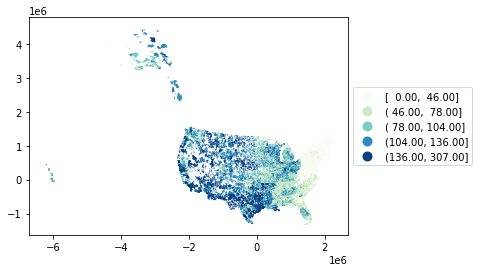

In [ ]:
plot